In [12]:
from functions import *

In [13]:
x_train, y_train, x_test, y_test =load_data("mnist.npz")
x_train, y_train, x_test, y_test = preprocess(x_train, y_train, x_test, y_test)

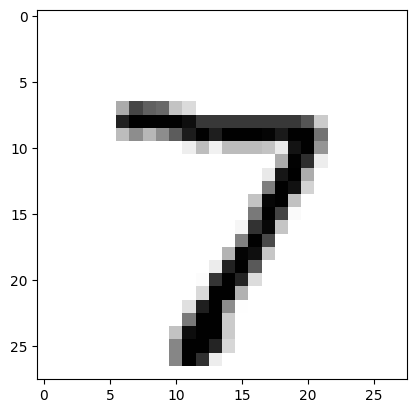

In [14]:
plt.imshow(255-x_test[0],cmap="gray")

In [24]:
x_test.shape

(10000, 28, 28)

In [15]:
class NeuralNetwork():
    def __init__(self,n_neuron=100):
        self.w1 = 0.1*np.random.rand(784,n_neuron)
        self.b1 = np.zeros(n_neuron)
        self.w2 = 0.1*np.random.rand(n_neuron, 10)
        self.b2 = np.zeros(10)

    def set_params(self, w1, b1, w2, b2):
        self.w1 = w1
        self.b1 = b1
        self.w2 = w2
        self.b2 = b2
    def params(self):
        return self.w1, self.b1, self.w2, self.b2
        
    def forward(self,x):
        x = x.reshape(x.shape[0],-1)
        z1 = np.matmul(x,self.w1) + self.b1
        a1 = sigmoid(z1)
        z2 = np.matmul(a1,self.w2) + self.b2
        a2 = softmax(z2)
        return z1, a1, z2, a2, x,
    
    def grad(self,x,y):
        output = self.forward(x)
        x = output[4]
        
        dz2 = output[3] - y 
        dw2 = der_w(dz2,output[1])
        db2 = np.mean(dz2,axis=0) 
        
        dz1 = np.matmul(dz2, self.w2.T) * dersigmoid(output[1]) 
        dw1 = der_w(dz1,x)
        db1 = np.mean(dz1,axis=0)
        loss = cross_entropy(output[3],y)
        val_loss = cross_entropy(output[3],y)
        return dw1, db1, dw2, db2, loss
    
    def predict(self,x):
        if x.ndim < 3:
            x = x[np.newaxis,...]
        return np.argmax(self.forward(x)[3],axis=1)
#output[1]@dz2

In [16]:
epochs = 4
lr = 0.819493107614262
n_neuron = 73
batch_size = 128

In [17]:
model = NeuralNetwork(n_neuron=128)

In [21]:
for epoch in range(epochs):
    for i in range(0,len(x_train),batch_size):
        Xbatch = x_train[i:i+batch_size]
        Ybatch = y_train[i:i+batch_size]
        grad = model.grad(Xbatch,Ybatch)
        w1,b1,w2,b2 = update_params(grad,model.params(),lr)
        model.set_params(w1,b1,w2,b2)
        val_loss = model.forward(x_test)[3]
        val_loss = cross_entropy(val_loss, y_test)
        loss = grad[4]
    print(f'epoch: {epoch+1}, loss: {loss}, val_loss: {val_loss}')

epoch: 1, loss: 0.2200675289898222, val_loss: 0.13770730056036642
epoch: 2, loss: 0.20889274314153608, val_loss: 0.1259600221814303
epoch: 3, loss: 0.19991899448389505, val_loss: 0.11663903919422546
epoch: 4, loss: 0.19268056827365235, val_loss: 0.10916939361556433


predicted: 2, actual: 2


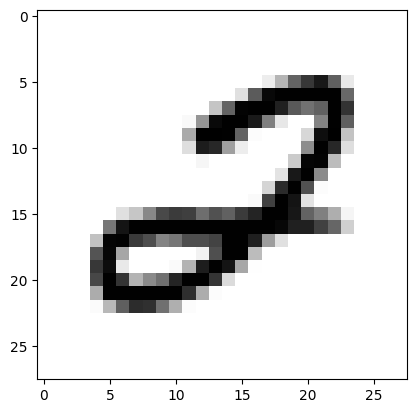

In [20]:
i = 1011
y_pred = model.predict(x_train[i])
y_true = np.argmax(y_train[i])
print(f'predicted: {int(y_pred)}, actual: {y_true}')
plt.imshow(1-x_train[i],cmap="gray")

In [9]:
y_pred = model.predict(x_train)
y_true = np.argmax(y_train, axis=1)

In [10]:
rcounter = 0
for i in range(len(x_train)):
    y_pred = model.predict(x_train[i])
    y_true = np.argmax(y_train[i])
    if int(y_pred) == int(y_true):
        rcounter+=1
print(f'{rcounter}/{len(x_train)}')

57299/60000


In [11]:
image = load_image("image.png")
result = int(model.predict(image))

predicted: 5


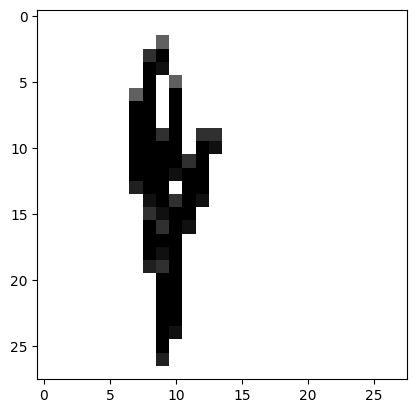

In [12]:
print("predicted:", result)
plt.imshow((1-image),cmap="gray")